In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot:xlabel='temp', ylabel='count'>

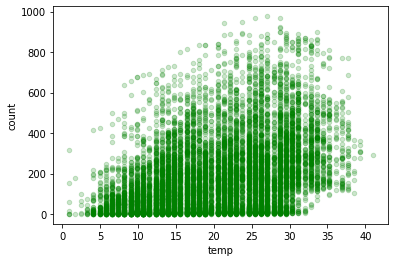

In [4]:
bikes.plot(kind='scatter',x='temp',y='count',alpha = 0.2,color = 'green')

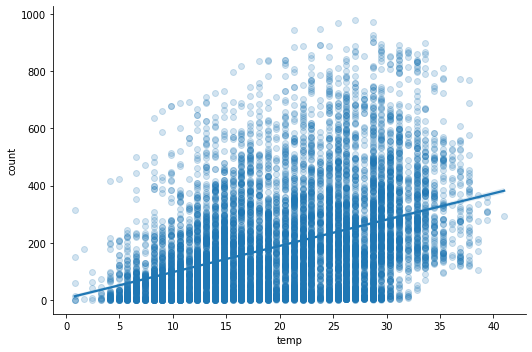

In [5]:
sns.lmplot(x='temp',y='count',data=bikes,aspect=1.5,scatter_kws={'alpha':0.2})

In [6]:
bikes[['count','temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


In [7]:
feature_cols = ['temp']
X = bikes[feature_cols] # Predictors
y = bikes['count'] #our response/ target variable

In [8]:
# import scikit-learn 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y) # fit the linesr model to the data


LinearRegression()

In [9]:
print(linreg.intercept_) # Beta_0

6.046212959616469


In [10]:
print(linreg.coef_) # Our Beta parameters 

[9.17054048]


In [11]:
linreg.predict([[20]])

c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([189.45702259])

In [12]:
feature_cols = ['temp','season','weather','humidity'] # List of features
X = bikes[feature_cols]
y = bikes['count']

In [13]:
linreg.fit(X,y)

LinearRegression()

In [14]:
zip(feature_cols, linreg.coef_)

In [15]:
linreg.predict(X)

array([ 13.49088138,  10.16059827,  10.16059827, ..., 175.7304041 ,
       175.7304041 , 153.68688069])

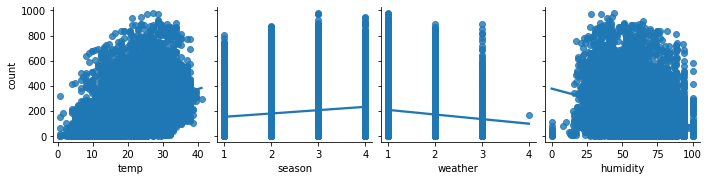

In [16]:
# Multiple scatter plots
sns.pairplot(bikes,x_vars = feature_cols,y_vars ='count',kind = 'reg')

In [17]:
true = [ 9,6,7,6]
pred = [8,7,7,12]

In [18]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(true,pred))
print('MSE',metrics.mean_squared_error(true,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(true,pred)))

MAE 2.0
MSE 9.5
RMSE 3.082207001484488


In [19]:
feature_cols = ['temp']

In [20]:
X = bikes[feature_cols]

In [21]:
linReg = LinearRegression()
linReg.fit(X,y)
y_pred = linReg.predict(X)
np.sqrt(metrics.mean_squared_error(y,y_pred)) #Root Mean Suare Error

166.44886243326746

Now, try it using temperture and humidity

In [22]:
feature_cols = ['temp','humidity']
X = bikes[feature_cols]
linReg = LinearRegression()
linReg.fit(X,y)
y_pred = linReg.predict(X)
np.sqrt(metrics.mean_squared_error(y,y_pred)) #Root Mean Suare Error

157.7992451452858

In [23]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


try using more predictors 

In [24]:
feature_cols = ['temp','humidity','season','holiday','workingday','windspeed','atemp']
X = bikes[feature_cols]
linReg = LinearRegression()
linReg.fit(X,y)
y_pred = linReg.predict(X)
np.sqrt(metrics.mean_squared_error(y,y_pred)) #Root Mean Suare Error

155.75989143430357

In [25]:
from sklearn.model_selection import train_test_split
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['count']
X_train, X_test, y_train,y_test= train_test_split(X,y)

In [26]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
y_pred = linReg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred)) #Root Mean Suare Error

167.88593144965418

In [27]:
feature_cols = ['temp','workingday']
X = bikes[feature_cols]
y = bikes['count']
X_train, X_test, y_train,y_test= train_test_split(X,y)

In [28]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
y_pred = linReg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred)) #Root Mean Suare Error

165.33563599952257

In [29]:
average_bike_rental = bikes['count'].mean()
average_bike_rental

191.57413191254824

In [30]:
num_rows = bikes.shape[0]
num_rows 

10886

In [31]:
null_model_predict = [average_bike_rental]*num_rows
null_model_predict

[191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191254824,
 191.57413191

In [32]:
np.sqrt(metrics.mean_squared_error(y,null_model_predict))

181.1361335742659

In [33]:
average_bike_rental = bikes['count'].mean()

In [34]:
bikes['above_average'] = bikes['count'] >= average_bike_rental

In [45]:
bikes['above_average'].value_counts(normalize=True)

False    0.599853
True     0.400147
Name: above_average, dtype: float64

In [46]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,above_average
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,True
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,True
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,False
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,False
